In [0]:
!pip install -U q kaggle
!mkdir -p ~/.kaggle

Requirement already up-to-date: q in /usr/local/lib/python3.6/dist-packages (2.6)
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haneeshtannerusai","key":"d196779682f57d02587024dc9db62567"}'}

# Covid_19 virus Analysis
![alt text](https://images.unsplash.com/photo-1583324113626-70df0f4deaab?ixlib=rb-1.2.1&auto=format&fit=crop&w=1000&q=80)

## Searching for Covid_19 Dataset in the kaggle datasets list

In [0]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets list -s covid_19_data.csv

ref                                              title                             size  lastUpdated          downloadCount  
-----------------------------------------------  -------------------------------  -----  -------------------  -------------  
sudalairajkumar/novel-corona-virus-2019-dataset  Novel Corona Virus 2019 Dataset  899KB  2020-05-04 04:23:41         171575  
pratik1235/covid19-csea                          COVID-19 (CSEA)                  397KB  2020-03-26 19:35:39            107  
okwirjulius/covid19-cases-in-africa              COVID-19 cases in Africa          18KB  2020-05-04 07:37:46             52  
solyoh21/csvzip19                                Csv   zip19                      525KB  2020-04-25 12:30:35              1  
usmantahirkiani/covid-19-datascv                 covid_19_data.scv                 82KB  2020-03-24 18:52:49              4  
amankhunt/corona-dataset                         Corona Dataset                   297KB  2020-03-12 18:50:27          

## Downloading the Covid_19 Dataset

In [0]:
!kaggle datasets download sudalairajkumar/novel-corona-virus-2019-dataset
!ls
!apt install unzip
!unzip novel-corona-virus-2019-dataset.zip

  0% 0.00/899k [00:00<?, ?B/s]
100% 899k/899k [00:00<00:00, 61.3MB/s]
kaggle.json  novel-corona-virus-2019-dataset.zip  sample_data
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Archive:  novel-corona-virus-2019-dataset.zip
  inflating: COVID19_line_list_data.csv  
  inflating: COVID19_open_line_list.csv  
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_confirmed_US.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_deaths_US.csv  
  inflating: time_series_covid_19_recovered.csv  


## Reading the Covid_19 Dataset and Printing the Last updated time

In [0]:
covid_19 = pd.read_csv('./covid_19_data.csv',parse_dates=['ObservationDate'])
print (covid_19.shape)
print ('Last update: ' + str(covid_19.ObservationDate.max()))

(21220, 8)
Last update: 2020-05-03 00:00:00


## Importing Required Libraries

In [0]:
# storing and anaysis
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import *
import plotly.express as px

import folium
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Javascript
from IPython.core.display import display, HTML
# color pallette
cdr = ['#ffffff', '#ff4040', '#1e90ff'] # grey - red - blue
idr = ['#eeee00', '#ff4040', '#1e90ff'] # yellow - red - blue
h = '#563893'
a = '#89b4ee'
n = '#bcd750'
e = '#e4bd38'
s = '#ef977b'
hanes = [h,a,n,e,s]
hns = [h, n, s]

## Cleaning the Dataset

In [0]:
checkdup = covid_19.groupby(['Country/Region','Province/State','ObservationDate']).count().iloc[:,0]
checkdup[checkdup>1]
covid_19 = covid_19[(covid_19.Confirmed>0) | (covid_19['Province/State'] == 'Recovered')]
covid_19 = covid_19.drop(['SNo', 'Last Update'], axis=1)
covid_19 = covid_19.rename(columns={'Country/Region': 'Country', 'ObservationDate':'Date'})
# To check null values
covid_19.isnull().sum()

Date                  0
Province/State    10868
Country               0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

## Sorting

In [0]:
# Sort data
covid_19 = covid_19.sort_values(['Date','Country','Province/State'])
# Add column of days since first case
covid_19['first_date'] = covid_19.groupby('Country')['Date'].transform('min')
covid_19['days'] = (covid_19['Date'] - covid_19['first_date']).dt.days

## Datewise Analysis

In [0]:
#Grouping different types of cases as per the date
datewise=covid_19.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid_19["Country"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  222
Total number of Confirmed Cases around the World:  3506729.0
Total number of Recovered Cases around the World:  1125236.0
Total number of Deaths Cases around the World:  247470.0
Total number of Active Cases around the World:  2134023.0
Total number of Closed Cases around the World:  1372706.0
Approximate number of Confirmed Cases per Day around the World:  34046.0
Approximate number of Recovered Cases per Day around the World:  10925.0
Approximate number of Death Cases per Day around the World:  2403.0
Approximate number of Confirmed Cases per hour around the World:  1419.0
Approximate number of Recovered Cases per hour around the World:  455.0
Approximate number of Death Cases per hour around the World:  100.0
Number of Confirmed Cases in last 24 hours:  79386.0
Number of Recovered Cases in last 24 hours:  32124.0
Number of Death Cases in last 24 hours:  3662.0


## Active cases over Date

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text major ticklabel objects>)

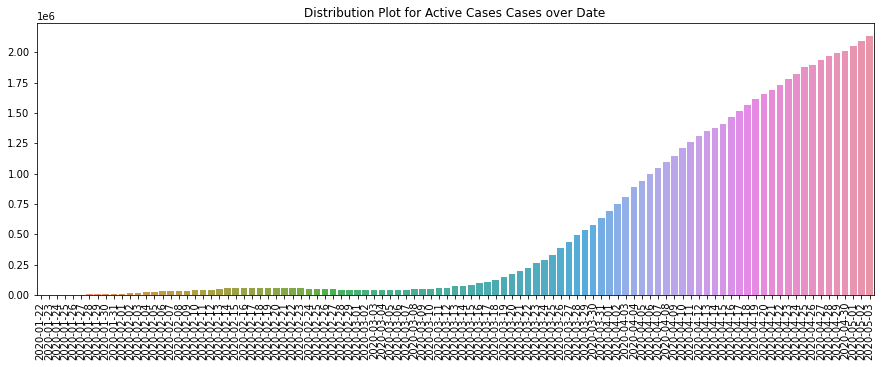

In [0]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution Plot for Active Cases Cases over Date")
plt.xticks(rotation=90)

## Closed cases over Date

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text major ticklabel objects>)

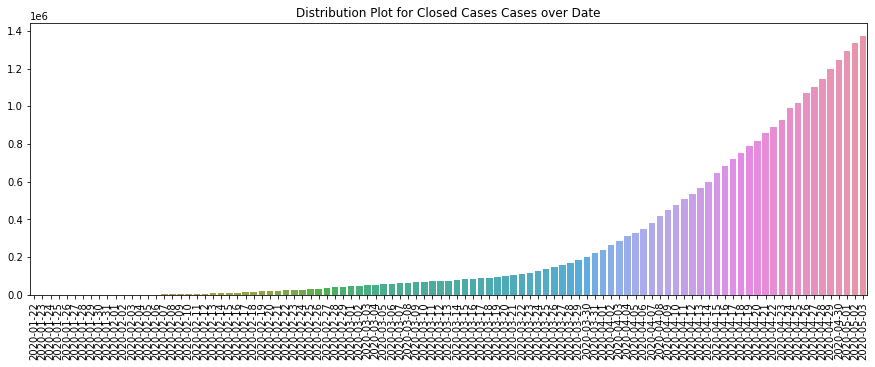

In [0]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution Plot for Closed Cases Cases over Date")
plt.xticks(rotation=90)

## Weekwise Analysis of Confirmed, Death and Recovered Cases

<function matplotlib.pyplot.xlabel>

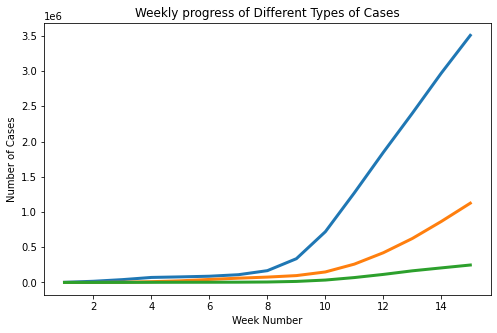

In [0]:
datewise["WeekOfYear"]=datewise.index.weekofyear
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.xlabel

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

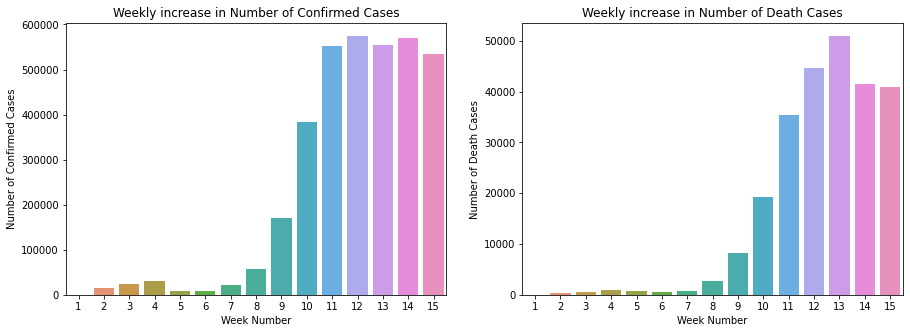

In [0]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

## Top 15 Countries with highest Confirmed, Death and Recovered Cases

In [0]:
latest=covid_19[covid_19.Date==covid_19.Date.max()]
cty = latest.groupby('Country').sum()

cty['Active'] = cty['Confirmed'] - cty['Deaths'] - cty['Recovered']
cty.drop('days',axis=1).sort_values('Confirmed', ascending=False).head(10)
fig = px.bar(cty['Country'].sort_values('Confirmed',ascending=False), 
             x="Confirmed", y="cty", color='cty', 
             text='confirmed', orientation='h', title='No. of Cases',
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
fig = px.bar(Country.sort_values('Deaths',ascending=False), 
             x="Deaths", y="Country", color='Country', 
             text='deaths', orientation='h', title='No. of Deaths',
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
fig = px.bar(Country.sort_values('Recovered',ascending=False),
             x="Recovered", y="Country", color='Country', 
             text='mortality', orientation='h', title='Recovered', 
             range_x=[0,100],
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
fig = px.bar(Country.sort_values('Active', ascending=False),
             x="Active", y="Country", color='Country', 
             text='Active', orientation='h', title='Active', 
             range_x=[0,200],
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

KeyError: ignored

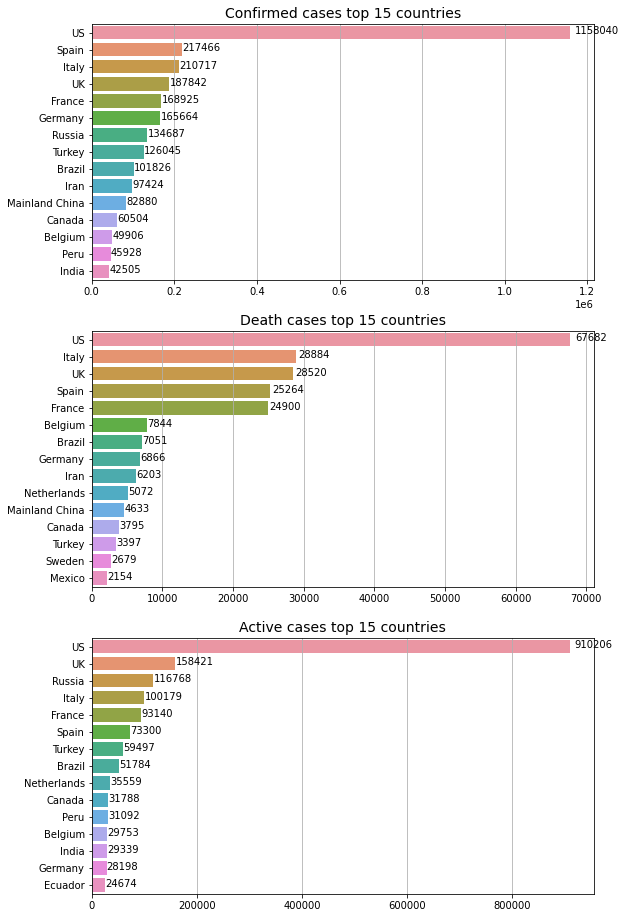

In [0]:
def plot_new(column, title):
    _ = cty.sort_values(column, ascending=False).head(15)
    g = sns.barplot(_[column], _.index)
    plt.title(title, fontsize=14)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.grid(axis='x')
    for i, v in enumerate(_[column]):
        if column == 'Death Rate':
            g.text(v*1.01, i+0.1, str(round(v,2)))
        else:
            g.text(v*1.01, i+0.1, str(int(v)))
plt.figure(figsize=(9,16))
plt.subplot(311)
plot_new('Confirmed','Confirmed cases top 15 countries')
plt.subplot(312)
plot_new('Deaths','Death cases top 15 countries')
plt.subplot(313)
plot_new('Active','Active cases top 15 countries')

plt.show()

## Top 15 Countries with Highest and Lowest Death Rates

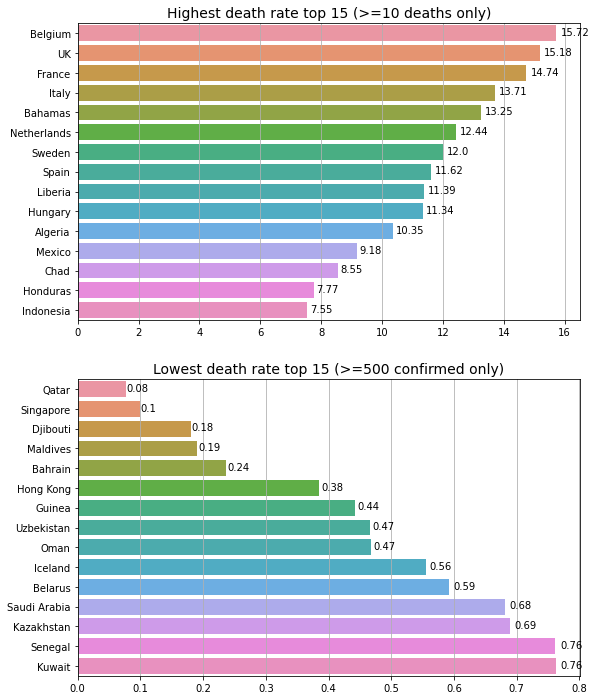

In [0]:
def plot_rate(rank, title):
    if rank == 'highest':
        _ = cty[cty.Deaths>=10].sort_values('Death Rate', ascending=False).head(15)
    else:
        _ = cty[cty.Confirmed>=500].sort_values('Death Rate').head(15)
    g = sns.barplot(_['Death Rate'], _.index)
    plt.title(title, fontsize=14)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.grid(axis='x')
    for i, v in enumerate(_['Death Rate']):
        g.text(v*1.01, i+0.1, str(round(v,2)))
plt.figure(figsize=(9,12))
plt.subplot(211)
plot_rate('highest','Highest death rate top 15 (>=10 deaths only)')
plt.subplot(212)
plot_rate('lowest','Lowest death rate top 15 (>=500 confirmed only)')

## Evolution of Cases in the world over time

> Indented block



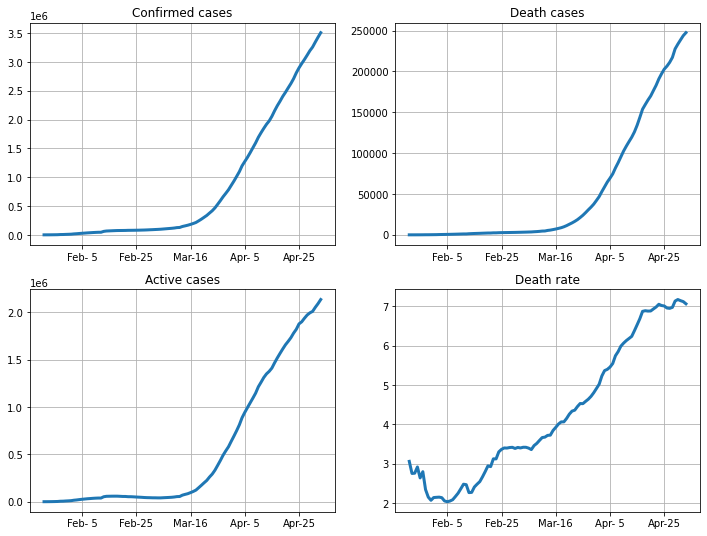

In [0]:
import matplotlib.dates as mdates
months_fmt = mdates.DateFormatter('%b-%e')
evo = covid_19.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
evo['Active'] = evo['Confirmed'] - evo['Deaths'] - evo['Recovered']
evo['Death Rate'] = evo['Deaths'] / evo['Confirmed'] * 100
evo['Recover Rate'] = evo['Recovered'] / evo['Confirmed'] * 100
fig, ax = plt.subplots(2, 2, figsize=(12,9))
def plot_evo(num, col, title):
    ax[num].plot(evo[col], lw=3)
    ax[num].set_title(title)
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(7))
    ax[num].xaxis.set_major_formatter(months_fmt)
    ax[num].grid(True)
plot_evo((0,0), 'Confirmed', 'Confirmed cases')
plot_evo((0,1), 'Deaths', 'Death cases')
plot_evo((1,0), 'Active', 'Active cases')
plot_evo((1,1), 'Death Rate', 'Death rate')

plt.show()

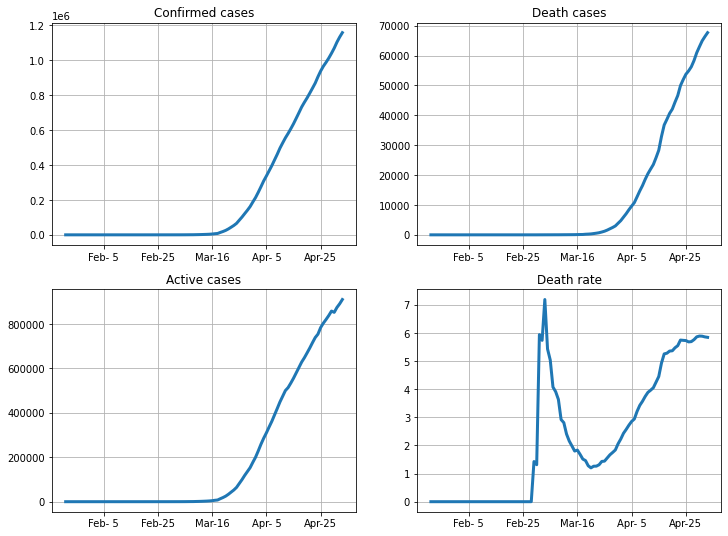

In [0]:
import matplotlib.dates as mdates
months_fmt = mdates.DateFormatter('%b-%e')
evo = covid_19[covid_19.Country=='Italy'].groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
evo['Active'] = evo['Confirmed'] - evo['Deaths'] - evo['Recovered']
evo['Death Rate'] = evo['Deaths'] / evo['Confirmed'] * 100
evo['Recover Rate'] = evo['Recovered'] / evo['Confirmed'] * 100
fig, ax = plt.subplots(2, 2, figsize=(12,9))
def plot_evo(num, col, title):
    ax[num].plot(evo[col], lw=3)
    ax[num].set_title(title)
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(7))
    ax[num].xaxis.set_major_formatter(months_fmt)
    ax[num].grid(True)
plot_evo((0,0), 'Confirmed', 'Confirmed cases')
plot_evo((0,1), 'Deaths', 'Death cases')
plot_evo((1,0), 'Active', 'Active cases')
plot_evo((1,1), 'Death Rate', 'Death rate')

plt.show()

In [0]:
def plot_cty(num, evo_col, title):
    ax[num].plot(evo_col, lw=3)
    ax[num].set_title(title)
    ax[num].xaxis.set_major_locator(plt.MaxNLocator(7))
    ax[num].xaxis.set_major_formatter(months_fmt)
    ax[num].grid(True)
def evo_cty(country):
    evo_cty = covid_19[covid_19.Country==country].groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
    evo_cty['Active'] = evo_cty['Confirmed'] - evo_cty['Deaths'] - evo_cty['Recovered']
    evo_cty['Death Rate'] = evo_cty['Deaths'] / evo_cty['Confirmed'] * 100
    plot_cty((0,0), evo_cty['Confirmed'], 'Confirmed cases')
    plot_cty((0,1), evo_cty['Deaths'], 'Death cases')
    plot_cty((1,0), evo_cty['Active'], 'Active cases')
    plot_cty((1,1), evo_cty['Death Rate'], 'Death rate')
    fig.suptitle(country, fontsize=16)
    plt.show()

## **Evolution of Cases in USA -- The number of cases are still increasing rapidly**

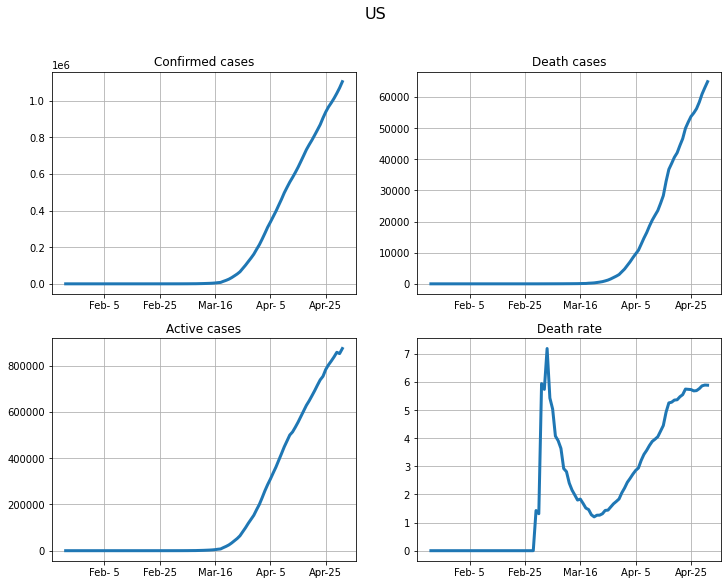

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(12,9))
evo_cty('US')

## Evolution of Cases in India -- Steady increase in Confirmed, Active and Death cases

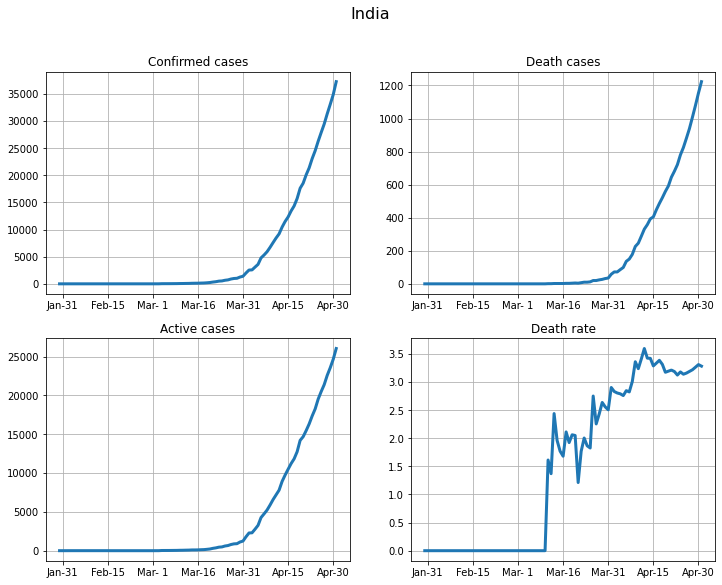

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(12,9))
evo_cty('India')


## Evolution of Cases in China -- Confirmed,Death Cases and Death Rate stay flat since early March.

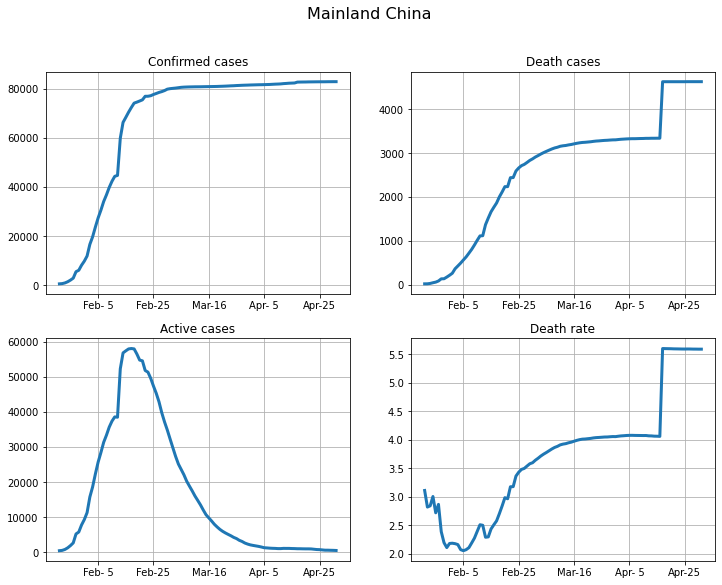

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(12,9))
evo_cty('Mainland China')


## Evolution of Cases in Italy --The number of active cases are decreasing

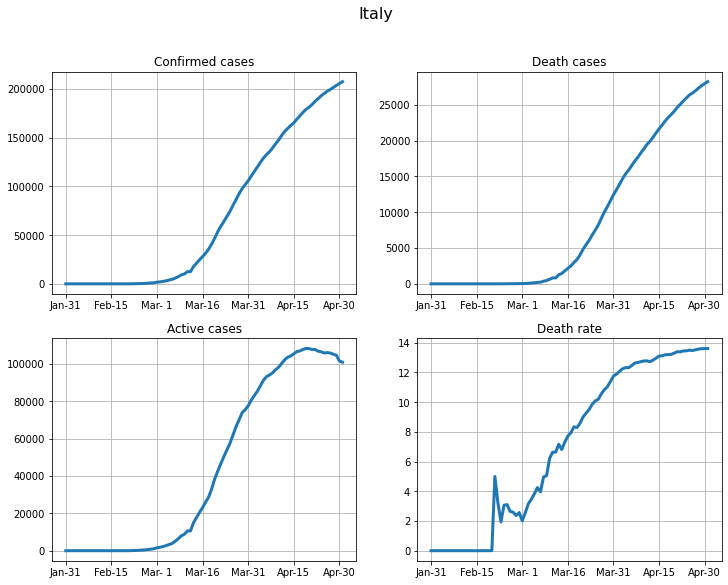

In [0]:
fig, ax = plt.subplots(2, 2, figsize=(12,9))
evo_cty('Italy')

## Comparison of Confirmed Cases Since First Case

> Indented block



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



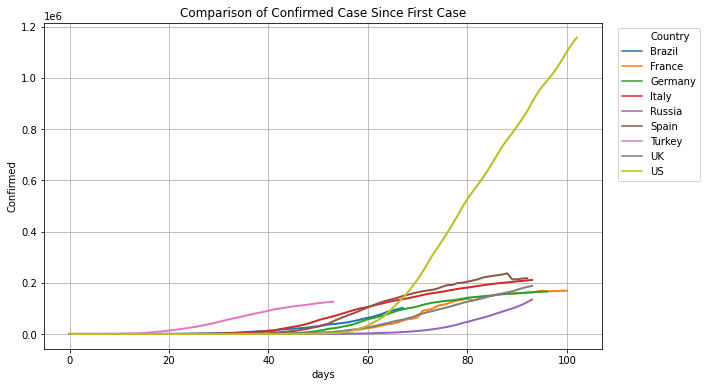

In [0]:
df_break = covid_19.groupby(['Country','days'])['Confirmed','Deaths'].sum().reset_index()
top10case = latest.sort_values('Confirmed', ascending=False).head(10)['Country'].to_list()
top10death = latest.sort_values('Deaths', ascending=False).head(10)['Country'].to_list()
_ = df_break[df_break.Country.isin(top10case)]
plt.figure(figsize=(10,6))
sns.lineplot(x='days',y='Confirmed', data=_, hue='Country', lw=2)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=10)
plt.grid(True)
plt.title('Comparison of Confirmed Case Since First Case')
plt.show()

## Comparison of Death cases Since First Case


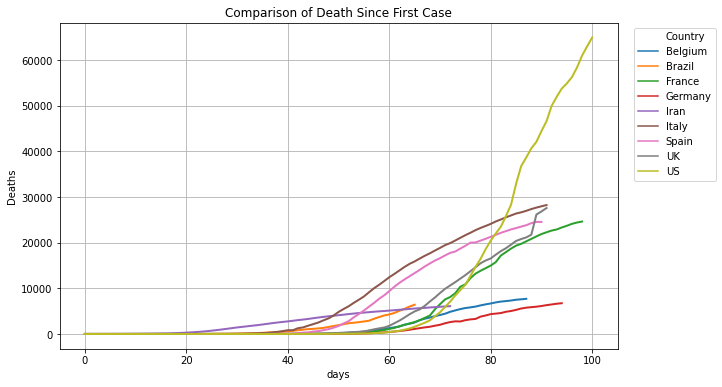

In [0]:
_ = df_break[df_break.Country.isin(top10death)]
plt.figure(figsize=(10,6))
sns.lineplot(x='days',y='Deaths', data=_, hue='Country', lw=2)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=10)
plt.grid(True)
plt.title('Comparison of Death Since First Case')
plt.show()

## Trajectory of first 10 countries with confirmed cases 



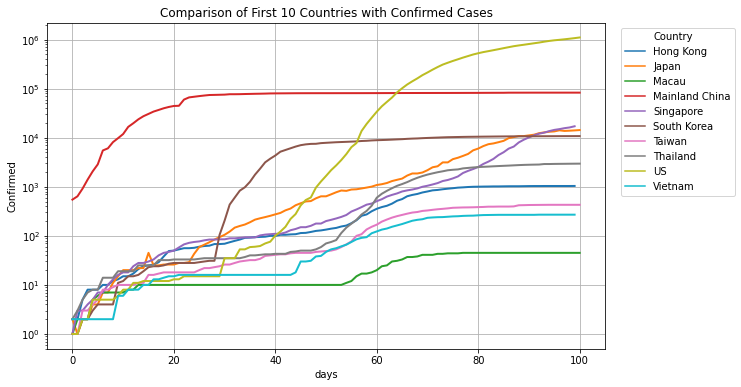

In [0]:
early_10 = covid_19.groupby('Country')['Date'].min().sort_values().head(10).index
_ = df_break[df_break.Country.isin(early_10)]
plt.figure(figsize=(10,6))
sns.lineplot(x='days',y='Confirmed', data=_, hue='Country', lw=2)
plt.legend(bbox_to_anchor=(1.02, 1), fontsize=10)
plt.yscale('log')
plt.grid(True)
plt.title('Comparison of First 10 Countries with Confirmed Cases')
plt.show()

In [0]:
!pip install plotly==4.5.2

## Heat map representations for Confirmed and Death Cases Worldwide

In [0]:
covid_19 = covid_19.groupby(['Date', 'Country'])['Confirmed', 'Deaths', 'Recovered']
covid_19 = covid_19.sum().reset_index()
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()
c_lat_grp = c_lat.groupby('Country')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = treemap(c_lat_grp, locations="Country", locationmode='country names',
                    color="Confirmed", hover_name="Country", 
                    color_continuous_scale="ylorrd", title='COVID-19 Confirmed')
fig.update(layout_coloraxis_showscale=False)
fig.show()
fig = px.choropleth(c_lat_grp[c_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="ylorrd", title='COVID-19 DEATHS')
fig.update(layout_coloraxis_showscale=False)
fig.show()
fig = px.treemap(c_lat_grp.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Confirmed", title='COVID-19 Confirmed',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()
fig = px.treemap(c_lat_grp.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Deaths", title='COVID-19 Deaths',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

NameError: ignored

# Ebola Virus Analysis
![alt text](https://s.abcnews.com/images/Health/180511_vod_orig_ebola_hpMain_16x9_992.jpg)

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Reading the dataset from Google drive and grouping the columns

In [0]:
ebola_14 = pd.read_csv("drive/My Drive/Corona_Project/ebola.csv", 
                       parse_dates=['Date'])
# selecting important columns only
ebola_14 = ebola_14[['Date', 'Country', 'No. of confirmed, probable and suspected cases',
                     'No. of confirmed, probable and suspected deaths']]
# renaming columns
ebola_14.columns = ['Date', 'Country', 'Cases', 'Deaths']
ebola_14.head()
# group by date and country
ebola_14 = ebola_14.groupby(['Date', 'Country'])['Cases', 'Deaths']
ebola_14 = ebola_14.sum().reset_index()
# filling missing values
ebola_14['Cases'] = ebola_14['Cases'].fillna(0)
ebola_14['Deaths'] = ebola_14['Deaths'].fillna(0)
# converting datatypes
ebola_14['Cases'] = ebola_14['Cases'].astype('int')
ebola_14['Deaths'] = ebola_14['Deaths'].astype('int')
# latest
e_lat = ebola_14[ebola_14['Date'] == max(ebola_14['Date'])].reset_index()
# latest grouped by country
e_lat_grp = e_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()
# nth day
ebola_14['nth_day'] = (ebola_14['Date'] - min(ebola_14['Date'])).dt.days
# day by day
e_dbd = ebola_14.groupby('Date')['Cases', 'Deaths'].sum().reset_index()
# nth day
e_dbd['nth_day'] = ebola_14.groupby('Date')['nth_day'].max().values
# no. of countries
temp = ebola_14[ebola_14['Cases']>0]
e_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values
e_dbd['new_cases'] = e_dbd['Cases'].diff()
e_dbd['new_deaths'] = e_dbd['Deaths'].diff()
e_dbd['epidemic'] = 'EBOLA'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## Heat map representations for Confirmed and Death Cases Worldwide

In [0]:
fig = px.choropleth(e_lat_grp[e_lat_grp['Cases']>0], locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="ylorrd", title='EBOLA 2014 Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()

fig = px.choropleth(e_lat_grp[e_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="ylorrd", title='EBOLA 2014 Deaths')
fig.update(layout_coloraxis_showscale=False)
fig.show()


fig = px.treemap(e_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='EBOLA Cases',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()


fig = px.treemap(e_lat_grp.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Deaths", title='EBOLA Deaths',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

# SARS virus Analysis
![alt text](https://upload.wikimedia.org/wikipedia/commons/7/76/Novel_Coronavirus_SARS-CoV-2.jpg)


In [0]:
sars_03 = pd.read_csv("drive/My Drive/Corona_Project/sars_2003.csv", 
                       parse_dates=['Date'])
# selecting important columns only
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]
# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']
# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()
# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()
# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()
# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days
# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()
# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values
# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values
s_dbd['new_cases'] = s_dbd['Cases'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()
s_dbd['epidemic'] = 'SARS'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## Heat map representations for Confirmed and Death Cases Worldwide

In [0]:
fig = px.choropleth(s_lat_grp[s_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="ylorrd", title='SARS 2003 Cases')
fig.update(layout_coloraxis_showscale=False)
fig.show()
fig = px.choropleth(s_lat_grp[s_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="ylorrd", title='SARS Deaths')
fig.update(layout_coloraxis_showscale=False)
fig.show()
fig = px.treemap(s_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='SARS Cases',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()
fig = px.treemap(s_lat_grp.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Deaths", title='SARS Deaths',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.data[0].textinfo = 'label+text+value'
fig.show()

# H1N1 virus Analysis
![alt text](https://50a8d2.medialib.edu.glogster.com/QovXND63Yylpu7iyFRQm/media/7b/7b9556d1edecf8d7d98a69a9bc5cfef2523c2c7c/dreamstime-10557057-h1n1-virus-swine-flu.jpg)

In [0]:
States = ["United States", "Brazil", "India",
          "Mexico", "China", "Turkey", 
          "Argentina", "Russia", "United Kingdom", 
          "Canada","France", "Spain", "Egypt",
          "Germany", "South Korea", "Thailand", 
          "Italy", "Columbia", "Peru", "Ukraine",
          "Ecuador", "Japan", "Australia",
          "Poland", "Chile", "Syria", 
          "Greece", "Iran", "Venezuela", "Hungary",
          "Saudi Arabia", "Portugal", "Romania",
          "Czech Republic", "Israel", "South Africa", 
          "Malaysia", "Belarus", "Serbia", "Hong Kong",
          "Cuba","Costa Rica","Morocco","Netherlands",
          "Bolivia","Vietnam","Algeria","Finland",
          "Slovakia","Paraguay","New Zeland","Taiwan",
          "Sri Lanka","Moldova","Palestinian Territories","Iraq","Austria","Bulgaria"]
Confirmed  = [113690,58178,33783,70715,120940,12316,11458,25339,28456,25828,1980000,1538,15812,222360,
              107939,31902,3064933,4310,9165,494,2251,11636,37484,2024,12258,452,17977,3672,2187,283,14500,
              166922,7006,2445,4330,12640,12210,102,695,33109,973,1867,2890,1473,2310,11186,916,6122,955,855,3199,5474,642,2524,1676,2880,964,766]
Deaths_value= [3433,2135,2024,1316,800,656,626,604,474,429,344,300,278,258,250,249,244,272,223,213,200,198,187,181,156,152,149,147,135,134,128,122,122,102,94,93,92,88,83,80,69,67,64,62,59,58,57,56,56,54,50,48,48,46,43,42,40,40]
df = pd.DataFrame(
    dict(States=States, Confirmed=Confirmed, Deaths_Value=Deaths_value)
)
df["States_in_US"] = "States_in_US"
df["Deaths"]="Deaths"
df["Active_Value"]=  df["Active"]=df["Confirmed"]-df["Deaths_Value"]
df["Active"]="Active"
df.head(60)

,States,Confirmed,Deaths_Value,States_in_US,Deaths,Active_Value,Active
0,United States,113690,3433,States_in_US,Deaths,110257,Active
1,Brazil,58178,2135,States_in_US,Deaths,56043,Active
2,India,33783,2024,States_in_US,Deaths,31759,Active
3,Mexico,70715,1316,States_in_US,Deaths,69399,Active
4,China,120940,800,States_in_US,Deaths,120140,Active
5,Turkey,12316,656,States_in_US,Deaths,11660,Active
6,Argentina,11458,626,States_in_US,Deaths,10832,Active
7,Russia,25339,604,States_in_US,Deaths,24735,Active
8,United Kingdom,28456,474,States_in_US,Deaths,27982,Active
9,Canada,25828,429,States_in_US,Deaths,25399,Active


## Heat map representations for Confirmed and Death Cases Worldwide

In [0]:
fig3 = go.Figure()
fig3.add_trace(go.Treemap(
    ids=df["Confirmed"],
    labels=df["States"],
    parents=df["Active"],
    values=df["Active_Value"],
    textinfo='label+value',
    domain=dict(column=0)
))
fig3.add_trace(go.Treemap(
    ids=df["Confirmed"],
    labels=df["States"],
    parents=df["Deaths"],
    values=df["Deaths_Value"],
    textinfo='label+value',
    domain=dict(column=1),
))
fig3.update_layout(
    grid= dict(columns=2, rows=1),
    margin = dict(t=0, l=0, r=0, b=0),
)
fig3.show()

In [0]:
c_cases = sum(c_lat_grp['Confirmed'])
c_deaths = sum(c_lat_grp['Deaths'])
c_no_countries = len(c_lat_grp['Country'].value_counts())
s_cases = sum(s_lat_grp['Cases'])
s_deaths = sum(s_lat_grp['Deaths'])
s_no_countries = len(s_lat_grp['Country'].value_counts())
e_cases = sum(e_lat_grp['Cases'])
e_deaths = sum(e_lat_grp['Deaths'])
e_no_countries = len(e_lat_grp['Country'].value_counts())

# Comparision of Different Viruses

In [0]:
epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'H1N1'],
    'start_year' : [2019, 2003, 2014, 2009],
    'end_year' : [0000, 2004, 2016, 2010],
  'confirmed' : [c_cases, s_cases, e_cases, 6724149],
    'deaths' : [c_deaths, s_deaths, e_deaths, 19654],
    'no_of_countries' : [c_no_countries, s_no_countries, e_no_countries, 178]
})
epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)
epidemics = epidemics.sort_values('end_year').reset_index(drop=True)
epidemics.head()

,epidemic,start_year,end_year,confirmed,deaths,no_of_countries,mortality
0,COVID-19,2019,0,3343777.0,238650.0,189,7.14
1,SARS,2003,2004,8432.0,813.0,31,9.64
2,H1N1,2009,2010,6724149.0,19654.0,178,0.29
3,EBOLA,2014,2016,28642.0,11319.0,10,39.52


In [0]:
fig = px.bar(epidemics.sort_values('confirmed',ascending=False), 
             x="confirmed", y="epidemic", color='epidemic', 
             text='confirmed', orientation='h', title='No. of Cases',
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
fig = px.bar(epidemics.sort_values('deaths',ascending=False), 
             x="deaths", y="epidemic", color='epidemic', 
             text='deaths', orientation='h', title='No. of Deaths',
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='auto')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
fig = px.bar(epidemics.sort_values('mortality',ascending=False),
             x="mortality", y="epidemic", color='epidemic', 
             text='mortality', orientation='h', title='Moratlity rate', 
             range_x=[0,100],
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
fig = px.bar(epidemics.sort_values('no_of_countries', ascending=False),
             x="no_of_countries", y="epidemic", color='epidemic', 
             text='no_of_countries', orientation='h', title='No. of Countries', 
             range_x=[0,200],
             color_discrete_sequence = [h,a,n,e,s])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()